In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [180]:
import pandas as pd

raw_df = pd.read_csv(
    r"C:\Users\ragha\OneDrive\learning\train.tsv",
    sep='\t'
)

raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [192]:
df.Phrase.sample(10).values #exploring the phrases

array(['Bebe Neuwirth', 'billing',
       'should be used to burn every print of the film', 'assaults',
       'on the level or merely',
       'he had a bad run in the market or a costly divorce , because there is no earthly reason other than money why this distinguished actor would stoop so low',
       'a coming-of-age story and cautionary parable', 'fully successful',
       'gem', 'scenes and'], dtype=object)

In [56]:
test_df=pd.read_csv(
    r"C:\Users\ragha\OneDrive\learning\test.tsv",
     sep='\t' 
)
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [58]:
sub_df=pd.read_csv(
    r"C:\Users\ragha\OneDrive\learning\sampleSubmission.csv"
)
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


Sentiment
2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: proportion, dtype: float64


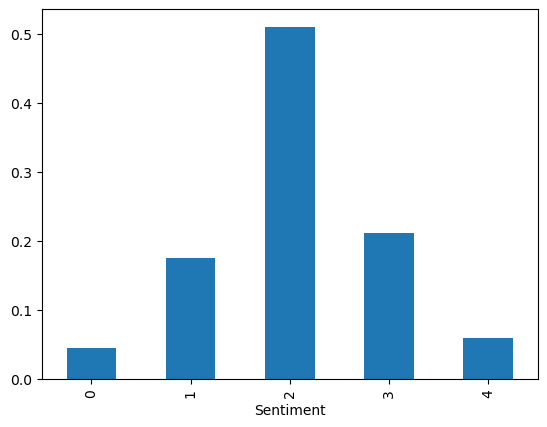

In [66]:
z=raw_df.Sentiment.value_counts(normalize=True)
z.sort_index().plot(kind='bar')
print(z)

In [ ]:
from nltk.tokenize import word_tokenize

In [89]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ragha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [91]:
word_tokenize("i am (the) pure consciousness!")

['i', 'am', '(', 'the', ')', 'pure', 'consciousness', '!']

In [97]:
from nltk.stem.snowball import SnowballStemmer

In [232]:
stemmer=SnowballStemmer(language='english')

In [234]:
stemmer.stem('Running')

'run'

In [236]:
import nltk
nltk.download('stopwords')
english_stopwords= stopwords.words('english')
", ".join(english_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ragha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, her, here, hers, herself, he's, him, himself, his, how, i, i'd, if, i'll, i'm, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, i've, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, shouldn, shouldn't, should've, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, 

In [239]:
def tokenize(text):
    tokens = word_tokenize(text.lower())  # Lowercase
    tokens = [token for token in tokens if token.isalpha()]  # Keep only alphabetic
    tokens = [stemmer.stem(token) for token in tokens if token not in english_stopwords]
    return tokens

In [241]:
tokenize('what do you mean, you completed ML?')

['mean', 'complet', 'ml']

In [243]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [245]:
vectorizer=TfidfVectorizer(tokenizer=tokenize, 
                           ngram_range=(1,2),
                           max_features=2300)

In [247]:
vectorizer.fit(raw_df.Phrase)

C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(max_features=2300, ngram_range=(1, 2),
                tokenizer=<function tokenize at 0x0000026C71A4E020>)

In [249]:
len(vectorizer.vocabulary_)

2300

In [253]:
vectorizer.get_feature_names_out()[:80]

array(['abandon', 'abil', 'abl', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'academi', 'accent', 'accept', 'access',
       'accomplish', 'account', 'accur', 'ach', 'achiev', 'across', 'act',
       'action', 'action film', 'action movi', 'action sequenc', 'actor',
       'actress', 'actual', 'ad', 'adam', 'adam sandler', 'adapt', 'add',
       'addit', 'adequ', 'admir', 'admit', 'adolesc', 'adult', 'advantag',
       'adventur', 'affair', 'affect', 'affirm', 'afraid', 'age', 'ago',
       'ahead', 'aim', 'aimless', 'air', 'album', 'alien', 'aliv',
       'allen', 'allow', 'almost', 'almost everi', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american', 'ami',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angl', 'angst',
       'anguish', 'anim'], dtype=object)

In [257]:
inputs=vectorizer.transform(raw_df.Phrase)

In [259]:
inputs.shape

(156060, 2300)

In [263]:
inputs.toarray()[0:100] 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [267]:
test_df = test_df.dropna(subset=['Phrase'])  # removing empty value 
test_inputs = vectorizer.transform(test_df.Phrase)

In [269]:
test_inputs.shape

(66291, 2300)

In [273]:
TRAIN_SIZE = 111000
train_inputs=inputs[:TRAIN_SIZE]
train_targets= raw_df.Sentiment[:TRAIN_SIZE]

In [275]:
train_inputs.shape ,train_targets.shape

((111000, 2300), (111000,))

In [277]:
val_inputs=inputs[TRAIN_SIZE:]
val_targets=raw_df.Sentiment[TRAIN_SIZE:]

In [279]:
val_inputs.shape , val_targets.shape

((45060, 2300), (45060,))

In [281]:
from sklearn.linear_model import LogisticRegression

In [313]:
model = LogisticRegression(max_iter=1000)
model.fit(train_inputs, train_targets)

LogisticRegression(max_iter=1000)

In [315]:
train_preds= model.predict(train_inputs)

In [317]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
110995    2
110996    0
110997    1
110998    1
110999    1
Name: Sentiment, Length: 111000, dtype: int64

In [319]:
train_preds

array([3, 2, 2, ..., 1, 1, 1], dtype=int64)

In [321]:
from sklearn.metrics import accuracy_score

In [323]:
accuracy_score(train_targets, train_preds)

0.6395495495495496

In [325]:
val_preds=model.predict(val_inputs)

In [327]:
accuracy_score(val_targets, val_preds)

0.5774079005770084

In [362]:
small_df=raw_df.sample(10)
small_df

,PhraseId,SentenceId,Phrase,Sentiment
146388,146389,7962,Signs is just another unoriginal run of the mi...,1
101877,101878,5362,Nakata did it better,1
130716,130717,7042,hotter-two-years-ago rap and R&B names and ref...,1
30977,30978,1444,Can be classified as one of those ` alternate ...,1
79256,79257,4081,a calculating fiend or just,2
108512,108513,5742,to each new horror,2
59881,59882,3021,food movies,2
46595,46596,2267,in trouble,2
20721,20722,924,cons,2
146259,146260,7952,its tagline,2


In [364]:
small_inputs=vectorizer.transform(small_df.Phrase)
small_inputs.shape

(10, 2300)

In [366]:
small_preds=model.predict(small_inputs)
small_preds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [368]:
accuracy_score(small_preds, small_df.Sentiment)

0.6

In [370]:
test_preds= model.predict(test_inputs)

In [372]:
test_preds

array([3, 3, 2, ..., 2, 2, 1], dtype=int64)

In [374]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [402]:
padded_preds = np.pad(test_preds, (0, len(sub_df) - len(test_preds)), constant_values=0)
sub_df['Sentiment'] = padded_preds

In [404]:
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3
...,...,...
66287,222348,1
66288,222349,2
66289,222350,2
66290,222351,1


In [410]:
sub_df.to_csv('submission.csv',index=None)